In [1]:
# Data Processing
import pandas as pd
import numpy as np

# PyTorch for LSTM Model
import torch
import torch.nn as nn
import torch.optim as optim

# Sklearn for Scaling
from sklearn.preprocessing import MinMaxScaler


In [4]:
import os

# Define the path to your financial reports directory
financial_reports_path = "/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/backend/data_processing/financial_reports"

# List files in the directory
print("Available files in financial_reports folder:")
print(os.listdir(financial_reports_path))


Available files in financial_reports folder:
['AAPL_cash_flow.csv', '.DS_Store', 'cleaned', 'IBM_income_statement.csv', 'AAPL_income_statement.csv', 'IBM_cash_flow.csv', 'AAPL_balance_sheet.csv', 'IBM_balance_sheet.csv']


In [6]:
import pandas as pd

# Define the path to the cleaned financial reports directory
cleaned_path = "/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/backend/data_processing/financial_reports/cleaned"

# Load cleaned financial statements
balance_sheet = pd.read_csv(f"{cleaned_path}/AAPL_balance_sheet_cleaned.csv")
income_statement = pd.read_csv(f"{cleaned_path}/AAPL_income_statement_cleaned.csv")
cash_flow = pd.read_csv(f"{cleaned_path}/AAPL_cash_flow_cleaned.csv")

# Convert "year" column to datetime format for sorting
balance_sheet["year"] = pd.to_datetime(balance_sheet["year"])
income_statement["year"] = pd.to_datetime(income_statement["year"])
cash_flow["year"] = pd.to_datetime(cash_flow["year"])

# Merge datasets on "year" column
df = balance_sheet.merge(income_statement, on=["year", "symbol", "reportedcurrency"], how="inner")
df = df.merge(cash_flow, on=["year", "symbol", "reportedcurrency"], how="inner")

# Sort data by year
df = df.sort_values("year")

# Display first few rows
print("Merged dataset preview:")
print(df.head())


Merged dataset preview:
         year  reportedcurrency   totalassets  totalcurrentassets  \
15 2009-09-30               0.0   47501000000         31555000000   
14 2010-09-30               0.0   75183000000         41678000000   
13 2011-09-30               0.0  116371000000         44988000000   
12 2012-09-30               0.0  176064000000         57653000000   
11 2013-09-30               0.0  207000000000         73286000000   

    cashandcashequivalentsatcarryingvalue  cashandshortterminvestments  \
15                             5263000000                  23464000000   
14                            11261000000                  25620000000   
13                             9815000000                  25952000000   
12                            10746000000                  29129000000   
11                            14259000000                  40546000000   

     inventory  currentnetreceivables  totalnoncurrentassets  \
15   455000000           3.361000e+09            235

In [7]:
import pandas as pd
import os

# Define cleaned data folder path
cleaned_data_path = "/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/backend/data_processing/financial_reports/cleaned"

# List of cleaned files
cleaned_files = os.listdir(cleaned_data_path)

# Initialize dictionary to store available years
company_years = {}

# Iterate through cleaned files
for file in cleaned_files:
    if file.endswith(".csv"):  # Ensure it's a CSV file
        file_path = os.path.join(cleaned_data_path, file)
        df = pd.read_csv(file_path)

        # Check available years
        if "year" in df.columns:
            available_years = sorted(pd.to_datetime(df["year"]).dt.year.unique())
            company_years[file] = available_years

# Print available years for each file
for file, years in company_years.items():
    print(f"{file}: {years}")



AAPL_cash_flow_cleaned.csv: [np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
IBM_income_statement_cleaned.csv: [np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
AAPL_balance_sheet_cleaned.csv: [np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
AAPL_income_statement_cleaned.csv: [np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.

In [8]:
import pandas as pd
import os

# Define cleaned data folder path
cleaned_data_path = "/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/backend/data_processing/financial_reports/cleaned"

# List of cleaned files
cleaned_files = os.listdir(cleaned_data_path)

# Target years (last 16 years)
target_years = list(range(2009, 2025))

# Process each cleaned file
for file in cleaned_files:
    if file.endswith(".csv"):  # Ensure it's a CSV file
        file_path = os.path.join(cleaned_data_path, file)
        df = pd.read_csv(file_path)

        # Convert 'year' to integer for filtering
        df["year"] = pd.to_datetime(df["year"]).dt.year

        # Keep only target years
        df = df[df["year"].isin(target_years)]

        # Save the cleaned version back
        df.to_csv(file_path, index=False)
        print(f"Trimmed {file} to 16 years (2009–2024) ✅")

print("All datasets are now consistent with 16 years of data!")


Trimmed AAPL_cash_flow_cleaned.csv to 16 years (2009–2024) ✅
Trimmed IBM_income_statement_cleaned.csv to 16 years (2009–2024) ✅
Trimmed AAPL_balance_sheet_cleaned.csv to 16 years (2009–2024) ✅
Trimmed AAPL_income_statement_cleaned.csv to 16 years (2009–2024) ✅
Trimmed IBM_cash_flow_cleaned.csv to 16 years (2009–2024) ✅
Trimmed IBM_balance_sheet_cleaned.csv to 16 years (2009–2024) ✅
All datasets are now consistent with 16 years of data!


In [9]:
import pandas as pd
import os

# Define the cleaned financial reports path
cleaned_data_path = "/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/backend/data_processing/financial_reports/cleaned"

# Define the required columns for each dataset
balance_sheet_cols = [
    "year", "totalcurrentassets", "totalnoncurrentassets",
    "totalcurrentliabilities", "totalnoncurrentliabilities", "totalshareholderequity"
]
income_statement_cols = [
    "year", "totalrevenue", "grossprofit", "operatingincome", "netincome"
]
cash_flow_cols = [
    "year", "operatingcashflow", "capitalexpenditures", "cashflowfromfinancing"
]

# Load data for AAPL as an example
balance_sheet = pd.read_csv(os.path.join(cleaned_data_path, "AAPL_balance_sheet_cleaned.csv"))[balance_sheet_cols]
income_statement = pd.read_csv(os.path.join(cleaned_data_path, "AAPL_income_statement_cleaned.csv"))[income_statement_cols]
cash_flow = pd.read_csv(os.path.join(cleaned_data_path, "AAPL_cash_flow_cleaned.csv"))[cash_flow_cols]

# Merge datasets on "year"
merged_data = balance_sheet.merge(income_statement, on="year").merge(cash_flow, on="year")

# Print first few rows
print("Merged Data (first 5 rows):")
print(merged_data.head())


Merged Data (first 5 rows):
   year  totalcurrentassets  totalnoncurrentassets  totalcurrentliabilities  \
0  2024        152987000000           211993000000             176392000000   
1  2023        143566000000           209017000000             145308000000   
2  2022        135405000000           217350000000             153982000000   
3  2021        134836000000           216166000000             125481000000   
4  2020        143713000000           180175000000             105392000000   

   totalnoncurrentliabilities  totalshareholderequity  totalrevenue  \
0                131638000000             56950000000  391035000000   
1                145129000000             62146000000  379352000000   
2                148101000000             50672000000  391397000000   
3                162431000000             63090000000  363172000000   
4                153157000000             65339000000  271642000000   

    grossprofit  operatingincome    netincome  operatingcashflow  \
0 

In [10]:
# Sort the data by year
merged_data = merged_data.sort_values(by="year").reset_index(drop=True)

# Check for missing values
missing_values = merged_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
year                          0
totalcurrentassets            0
totalnoncurrentassets         0
totalcurrentliabilities       0
totalnoncurrentliabilities    0
totalshareholderequity        0
totalrevenue                  0
grossprofit                   0
operatingincome               0
netincome                     0
operatingcashflow             0
capitalexpenditures           0
cashflowfromfinancing         0
dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select only numeric columns for scaling (excluding 'year' and 'symbol')
numeric_cols = merged_data.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('year')  # Keep year unchanged

# Apply MinMaxScaler
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])

print("Data normalization complete! Here’s a preview:")
print(merged_data.head())


Data normalization complete! Here’s a preview:
   year  totalcurrentassets  totalnoncurrentassets  totalcurrentliabilities  \
0  2009            0.000000               0.000000                 0.000000   
1  2010            0.077119               0.092835                 0.055893   
2  2011            0.102336               0.276692                 0.099851   
3  2012            0.198821               0.525294                 0.163968   
4  2013            0.317917               0.598266                 0.194995   

   totalnoncurrentliabilities  totalshareholderequity  totalrevenue  \
0                    0.000000                0.000000      0.000000   
1                    0.041847                0.157714      0.064047   
2                    0.110902                0.439179      0.187505   
3                    0.200037                0.845352      0.325985   
4                    0.221204                0.897487      0.366921   

   grossprofit  operatingincome  netincome  operati

In [17]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., using 5 past years to predict the next)
SEQ_LENGTH = 5  

# Select a new target column for prediction (e.g., totalrevenue)
target_col = "totalrevenue"  # Change this to any valid column
target_data = merged_data[target_col].values.reshape(-1, 1)

# Create sequences
X, y = create_sequences(target_data, SEQ_LENGTH)

print(f"Sequences created! X shape: {X.shape}, y shape: {y.shape}")


Sequences created! X shape: (11, 5, 1), y shape: (11, 1)


In [18]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (8, 5, 1), Test shape: (3, 5, 1)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer (predicting one value)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

print("✅ Model training complete!")


Epoch 1/50


/Users/kdn_aigayatrikadam/Desktop/Projects/Project-5/AI Powered financial reporting/env-financial-reporting/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 0.3722 - val_loss: 0.9350
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3636 - val_loss: 0.9175
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3552 - val_loss: 0.9002
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3471 - val_loss: 0.8832
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3392 - val_loss: 0.8665
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3316 - val_loss: 0.8500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3241 - val_loss: 0.8336
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3167 - val_loss: 0.8173
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3090 - val_loss: 0.8007
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3012 - val_loss: 0.7834
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2931 - val_loss: 0.7655
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2847 - val_loss: 0.7469
Epoch 13/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


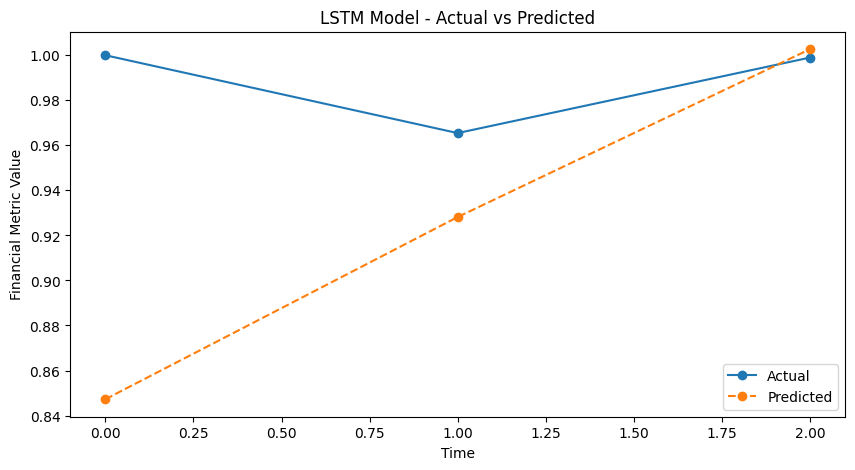

In [20]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Convert to original scale (if needed)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred = scaler.inverse_transform(y_pred)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="o", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Financial Metric Value")
plt.legend()
plt.title("LSTM Model - Actual vs Predicted")
plt.show()


In [ ]:
# Ensure we inverse transform only the target column
if 'scaler' in globals():
    # Get number of features from scaler
    num_features = scaler.scale_.shape[0]

    # Pad y_test and y_pred to match num_features
    padding_test = np.zeros((y_test.shape[0], num_features - 1))  # Exclude the target column
    y_test_padded = np.concatenate((y_test, padding_test), axis=1)

    padding_pred = np.zeros((y_pred.shape[0], num_features - 1))
    y_pred_padded = np.concatenate((y_pred, padding_pred), axis=1)

    # Inverse transform and extract the target column
    y_test_original = scaler.inverse_transform(y_test_padded)[:, 0]
    y_pred_original = scaler.inverse_transform(y_pred_padded)[:, 0]
else:
    y_test_original = y_test
    y_pred_original = y_pred


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate error metrics
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📈 R² Score: {r2:.4f}")


📉 Mean Squared Error (MSE): 142065234628870733824.00
📊 Mean Absolute Error (MAE): 8477160457.46
📈 R² Score: -30.9911


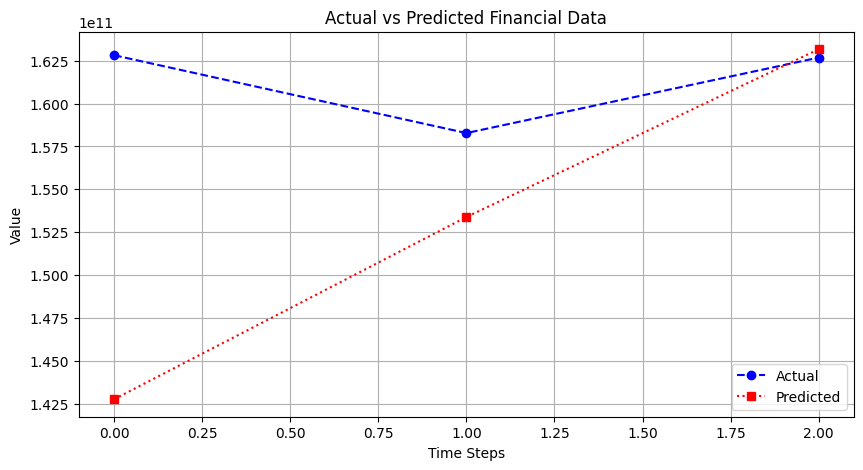

In [28]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual", marker='o', linestyle='dashed', color='blue')
plt.plot(y_pred_original, label="Predicted", marker='s', linestyle='dotted', color='red')
plt.title("Actual vs Predicted Financial Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
